In [1]:
%matplotlib inline

# Median FIlter Design and Analysis

In [2]:
from pathlib import Path

import matplotlib.pyplot as plt
import numpy as np

Load ECG to ndarray

In [3]:
ecg_file = Path('../') / 'example_data' / 'ECG.tsv'
raw_data = np.genfromtxt(fname=ecg_file, dtype=float)

In [4]:
data = raw_data[:1000, :]

## Filter operation

In [5]:
def median_filter(x: np.array, taps: int) -> np.array:
    y = np.zeros(x.shape)
    for i in range(x.size):
        window_start = max(0, i-taps+1)
        window_end = i+1
        y[i] = np.median(x[window_start:window_end])
    return y

In [6]:
def conv2db(x: np.ndarray):
    return 10 * np.log10(np.abs(x))

## Random Data Input

Filter random signal using median filter with varying number of "taps".

In [7]:
N_SAMPLES = 10000
N_N_TAPS = 6
SUBPLOT_SIZE = (3, 2)
n = np.arange(0, N_SAMPLES, 1)

x = np.random.rand(N_SAMPLES)

y = dict()
for i in range(N_N_TAPS):
    taps = (i+1) * 5 
    y[i] = median_filter(x, taps=taps)

Plot input and output sample in time domain

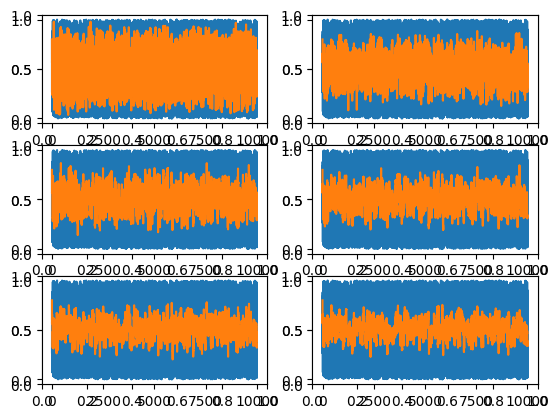

In [8]:
fig, ax = plt.subplots(*SUBPLOT_SIZE)
for i in range(N_N_TAPS):
    ax = fig.add_subplot(*SUBPLOT_SIZE, i+1)
    ax.plot(n, x, y[i])

Compute FFTs of input and output signals

In [9]:
fft_x = np.fft.fft(x)

fft_y = dict()
for i in range(N_N_TAPS):
    fft_y[i] = np.fft.fft(y[i])

Plot DFTs

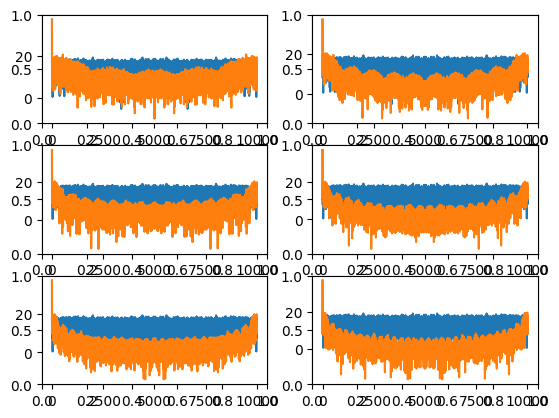

In [10]:
fig, ax = plt.subplots(*SUBPLOT_SIZE)
for i in range(N_N_TAPS):
    ax = fig.add_subplot(*SUBPLOT_SIZE, i+1)
    ax.plot(n, conv2db(fft_x), conv2db(fft_y[i]))